In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from os import listdir
from os.path import join, exists
import matplotlib

In [3]:
params = {'backend': 'ps',
#           'text.latex.preamble': [r'\usepackage{gensymb}'],
          'axes.labelsize': 8, # fontsize for x and y labels (was 10)
          'axes.titlesize': 8,
          'font.size': 8, # was 10
          'legend.fontsize': 8, # was 10
          'xtick.labelsize': 8,
          'ytick.labelsize': 8,
          'font.family': 'serif',
}

matplotlib.rcParams.update(params)

In [9]:
shallow = pd.read_csv(r'.\logs\VGG11\CatVsDog\VGG11_bs128_e20_id0.csv', sep=';')
shallow.head(20)

,Unnamed: 0,eval-saturation_classifier-2,eval-saturation_classifier-6,eval-saturation_features-0,eval-saturation_features-11,eval-saturation_features-15,eval-saturation_features-18,eval-saturation_features-22,eval-saturation_features-25,eval-saturation_features-4,...,train-saturation_features-0,train-saturation_features-11,train-saturation_features-15,train-saturation_features-18,train-saturation_features-22,train-saturation_features-25,train-saturation_features-4,train-saturation_features-8,training_accuracy,training_loss
0,0,76.56,50.0,3.12,16.80,13.87,35.35,52.93,61.33,3.91,...,3.12,22.66,17.97,44.14,66.02,73.44,5.47,7.03,0.5575,0.005392
1,1,78.91,50.0,4.69,19.14,16.02,40.43,60.94,68.95,4.69,...,4.69,25.00,19.14,45.70,67.77,75.00,6.25,8.20,0.6132,0.005160
2,2,79.69,50.0,4.69,20.31,16.80,41.60,63.09,71.09,5.47,...,4.69,26.17,20.12,46.68,68.36,75.39,7.03,9.38,0.6481,0.004980
3,3,79.69,50.0,6.25,21.48,17.38,42.38,64.06,71.88,7.03,...,6.25,27.34,20.90,47.07,68.75,75.59,8.59,10.16,0.6718,0.004738
4,4,79.69,50.0,6.25,22.27,17.58,42.77,64.84,72.27,7.81,...,7.81,28.12,21.29,47.27,68.75,75.78,8.59,10.94,0.6832,0.004636
5,5,79.69,50.0,6.25,23.05,17.97,43.36,65.23,72.66,8.59,...,7.81,28.91,21.68,47.66,68.95,75.78,9.38,11.33,0.7002,0.004503
6,6,79.69,50.0,6.25,23.83,18.16,43.55,65.43,72.85,8.59,...,9.38,29.30,21.88,47.66,68.95,75.78,10.16,12.11,0.7104,0.004389
7,7,79.30,50.0,6.25,24.22,18.36,43.75,65.62,73.05,9.38,...,9.38,29.30,22.07,47.85,68.95,75.78,10.16,12.11,0.7269,0.004234
8,8,79.30,50.0,7.81,25.00,18.55,43.95,65.82,73.24,10.16,...,9.38,29.69,22.27,48.05,69.14,75.59,10.94,12.50,0.7239,0.004229
9,9,79.30,50.0,7.81,25.39,18.75,44.14,66.02,73.24,10.16,...,10.94,30.08,22.46,48.05,69.14,75.78,10.94,12.89,0.7346,0.004144


In [ ]:
deep = pd.read_csv('cd_128_VGG11VGG19VGG19_XXXS_A1.csv', sep=';')
deep.head(20)

In [ ]:
medium = pd.read_csv('cd_64_VGG11VGG19VGG19_XXXS_A1.csv', sep=';')
medium.head(20)

In [16]:
def extract_layer_saturation(df, excluded = 'classifier6', epoch=20):
    cols = list(df.columns)
    print(cols)
    train_cols = [col for col in cols if 'train' in col and not excluded in col and not 'accuracy' in col and not 'loss' in col]
    epoch_df = df[df.index.values == epoch]
    epoch_df = epoch_df[train_cols]
    return epoch_df

In [17]:
shallow_sats = extract_layer_saturation(shallow)
shallow_sats.head()

['Unnamed: 0', 'eval-saturation_classifier-2', 'eval-saturation_classifier-6', 'eval-saturation_features-0', 'eval-saturation_features-11', 'eval-saturation_features-15', 'eval-saturation_features-18', 'eval-saturation_features-22', 'eval-saturation_features-25', 'eval-saturation_features-4', 'eval-saturation_features-8', 'test_accuracy', 'test_loss', 'train-saturation_classifier-2', 'train-saturation_classifier-6', 'train-saturation_features-0', 'train-saturation_features-11', 'train-saturation_features-15', 'train-saturation_features-18', 'train-saturation_features-22', 'train-saturation_features-25', 'train-saturation_features-4', 'train-saturation_features-8', 'training_accuracy', 'training_loss']


,train-saturation_classifier-2,train-saturation_classifier-6,train-saturation_features-0,train-saturation_features-11,train-saturation_features-15,train-saturation_features-18,train-saturation_features-22,train-saturation_features-25,train-saturation_features-4,train-saturation_features-8


In [15]:
deep_sats = extract_layer_saturation(deep)
deep_sats.head()

NameError: name 'deep' is not defined

In [8]:
medium_sats = extract_layer_saturation(medium)
medium_sats.head()

NameError: name 'medium' is not defined

In [9]:
deep_sats.values[0]

NameError: name 'deep_sats' is not defined

In [10]:
def plot_saturation_level(df, title=''):
    cols = list(df.columns)
    col_names = ['Layer {}'.format(i+1) for i in range(len(df.columns))]
    plt.figure(figsize=(7,5))
    plt.grid()
    plt.bar(list(range(len(cols))), df.values[0])
    plt.xticks(list(range(len(cols))), col_names, rotation='vertical', fontsize=16)
    plt.ylim((0,100))
    plt.yticks(fontsize=16)
    plt.xlabel('Layers', fontsize=16)
    plt.title(title, fontsize=16)
    plt.ylabel('Saturation in %', rotation='vertical', fontsize=16)
    plt.show()
    
def plot_saturation_level_ax(df, ax):
    cols = list(df.columns)
    col_names = [i+1 for i in range(len(df.columns))]
    ax.grid()
    ax.bar(list(range(len(cols))), df.values[0])
    ax.set_xticks([])
    ax.set_ylim((0,100))
    #plt.yticks(fontsize=16)
    #plt.xlabel('Layers', fontsize=16)
    #plt.title(title, fontsize=16)
    #plt.ylabel('Saturation in %', rotation='vertical', fontsize=16)
        

In [11]:
plot_saturation_level(shallow_sats, '60.57% Test Accuracy')

NameError: name 'shallow_sats' is not defined

In [12]:
plot_saturation_level(deep_sats, '87.52% Test Accuracy')

NameError: name 'deep_sats' is not defined

In [13]:
plot_saturation_level(medium_sats, '88.74% Test Accuracy')

NameError: name 'medium_sats' is not defined

In [14]:
vgg13 = pd.read_csv('10_VGG13_A0.csv', sep=';')
vgg13.head(20)

,Unnamed: 0,eval_features0,eval_features3,eval_features7,eval_features10,eval_features14,eval_features17,eval_features21,eval_features24,eval_features28,...,train_features28,train_features31,train_classifier2,train_classifier6,train_accuracy,test_accuracy,train_loss,test_loss,epoch,time_per_step
0,0,1.56,1.56,0.78,0.78,0.39,0.39,0.20,0.20,0.20,...,1.95,1.76,3.12,50.0,0.51446,0.5768,0.010431,0.009561,0,0.000833
1,1,3.12,4.69,3.12,3.12,1.56,1.56,0.78,0.78,0.78,...,3.71,3.12,5.86,60.0,0.68556,0.7027,0.006931,0.006698,1,0.000937
2,2,3.12,6.25,4.69,4.69,2.34,2.34,1.17,0.98,0.98,...,4.49,4.10,7.03,70.0,0.75382,0.7651,0.005552,0.005424,2,0.001055
3,3,6.25,10.94,6.25,6.25,3.12,3.12,1.56,1.56,1.37,...,5.08,4.69,8.59,70.0,0.79044,0.7809,0.004745,0.005298,3,0.001152
4,4,6.25,14.06,8.59,8.59,4.69,4.69,2.34,2.34,1.95,...,5.47,5.08,8.98,70.0,0.81698,0.7989,0.004189,0.004644,4,0.001151
5,5,7.81,15.62,9.38,9.38,5.47,5.47,2.73,2.73,2.15,...,6.05,5.66,10.16,70.0,0.83842,0.8111,0.003738,0.004345,5,0.001223
6,6,9.38,15.62,10.94,10.94,5.86,6.25,3.12,2.93,2.34,...,6.45,5.86,10.94,70.0,0.85158,0.8355,0.003414,0.003851,6,0.001290
7,7,10.94,17.19,11.72,12.50,6.64,7.03,3.52,3.12,2.54,...,6.64,6.05,11.33,70.0,0.86240,0.8508,0.003145,0.003407,7,0.001462
8,8,12.50,18.75,12.50,13.28,7.03,7.81,3.71,3.52,2.54,...,7.23,6.64,12.11,70.0,0.87564,0.8627,0.002862,0.003252,8,0.001589
9,9,12.50,20.31,14.06,14.84,7.81,8.59,4.10,3.71,2.54,...,7.23,6.84,12.11,70.0,0.88294,0.8526,0.002663,0.003563,9,0.001704


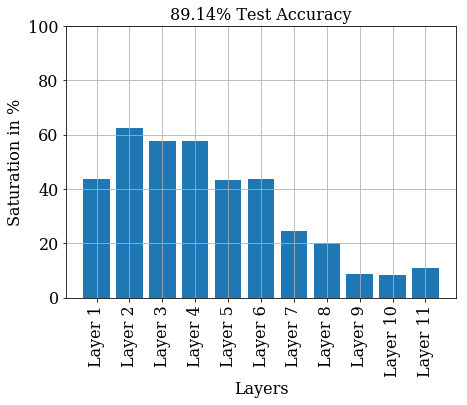

In [15]:
plot_saturation_level(extract_layer_saturation(vgg13), '89.14% Test Accuracy')

In [16]:
cd_vgg13 = pd.read_csv('catdog_VGG13_A0.csv', sep=';')

In [17]:
cd_vgg13 = pd.read_csv('catdog_VGG13_A0.csv', sep=';')
cd_vgg13.head(20)

,Unnamed: 0,train_features0,train_features3,train_features7,train_features10,train_features14,train_features17,train_features21,train_features24,train_features28,train_features31,train_classifier2,train_classifier6,train_accuracy,test_accuracy,train_loss,test_loss,epoch,time_per_step
0,0,1.56,1.56,0.78,0.78,0.39,0.39,0.20,0.20,0.20,0.20,0.39,0.0,0.6225,0.6995,0.005065,0.004839,0,0.001485
1,1,3.12,6.25,3.12,3.12,1.56,1.17,0.59,0.59,0.59,0.39,0.78,0.0,0.7218,0.7340,0.004275,0.004171,1,0.001489
2,2,3.12,7.81,3.91,3.91,1.95,1.95,0.98,0.78,0.78,0.59,1.17,0.0,0.7654,0.7625,0.003784,0.003929,2,0.001514
3,3,6.25,12.50,7.03,7.03,3.52,3.52,1.37,1.17,1.17,0.59,1.17,0.0,0.7871,0.7995,0.003504,0.003280,3,0.001593
4,4,7.81,15.62,7.81,8.59,4.30,4.30,1.76,1.56,1.56,0.78,1.56,0.0,0.7976,0.8040,0.003336,0.003363,4,0.001533
5,5,10.94,18.75,10.16,10.94,5.47,5.86,2.34,2.15,1.95,1.17,1.56,0.0,0.8258,0.8160,0.003005,0.003159,5,0.001652
6,6,10.94,20.31,11.72,11.72,6.25,6.64,2.54,2.34,1.95,1.37,1.56,0.0,0.8341,0.8480,0.002919,0.002829,6,0.001558
7,7,12.50,21.88,12.50,13.28,6.64,7.03,2.93,2.54,2.15,1.37,1.95,0.0,0.8427,0.8010,0.002770,0.003457,7,0.001567
8,8,14.06,23.44,13.28,14.06,7.42,7.81,3.12,2.73,2.34,1.56,1.95,0.0,0.8532,0.8195,0.002597,0.003333,8,0.001579
9,9,15.62,25.00,14.84,14.84,7.81,8.20,3.32,2.93,2.34,1.56,1.95,0.0,0.8591,0.8070,0.002520,0.003280,9,0.001593


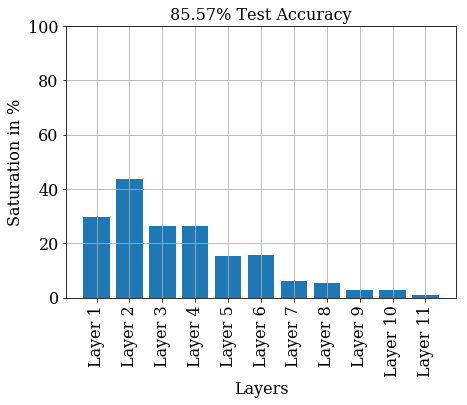

In [18]:
plot_saturation_level(extract_layer_saturation(cd_vgg13), '85.57% Test Accuracy')

In [19]:
for i in range(20):
    deep_sats = extract_layer_saturation(deep, epoch=i)
    plot_saturation_level(deep_sats, '85.75% Test Accuracy')

NameError: name 'deep' is not defined

In [20]:
for i in range(20):
    deep_sats = extract_layer_saturation(shallow, epoch=i)
    plot_saturation_level(deep_sats)

NameError: name 'shallow' is not defined

In [21]:
for i in range(20):
    deep_sats = extract_layer_saturation(medium, epoch=i)
    plot_saturation_level(deep_sats)

NameError: name 'medium' is not defined

In [22]:
cvd_csvs = []

In [23]:
cf_csvs = []

Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 917, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_webagg.py", line 44, in run
    tornado.ioloop.IOLoop.instance().start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 221, in instance
    return IOLoop.current()
  File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\ioloop.py", line 282, in current
    loop = asyncio.get_event_loop()
  File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 644, in get_event_loop
    % threading.current_thread().name)
RuntimeError: There is no current event loop in thread 'Thread-6'.



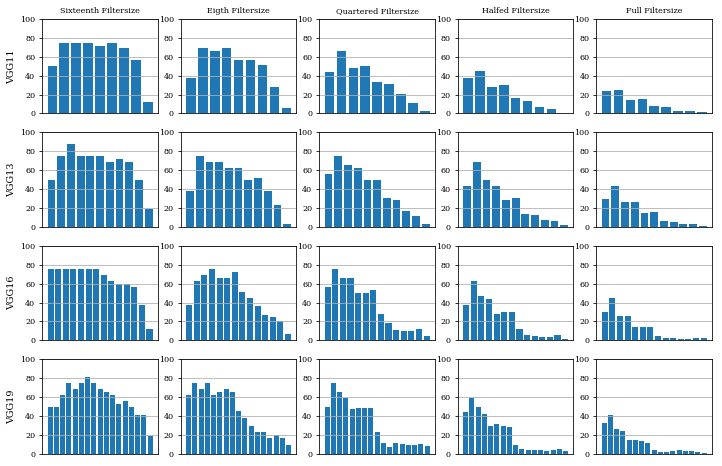

In [28]:
import matplotlib.pyplot as plt
matplotlib.use('webagg')


cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = 'catdog_VGG{}{}_A0.csv'.format(net, filterstack)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=20)
        plot_saturation_level_ax(df, axes[i][j])
#plt.show()
plt.savefig('collage_catdog.eps')

RuntimeError: threads can only be started once

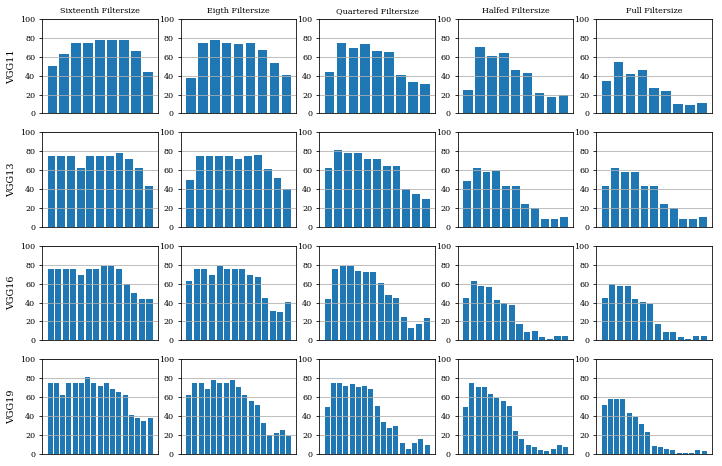

In [29]:
import matplotlib.pyplot as plt

cols = ['{} Filtersize'.format(col) for col in reversed(['Full','Halfed', 'Quartered', 'Eigth', 'Sixteenth'])]
rows = ['{}'.format(row) for row in ['VGG11', 'VGG13', 'VGG16', 'VGG19']]

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12, 8))
for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation='vertical', size='large')

    

#fig.tight_layout()
for i,net in enumerate([11, 13, 16, 19]):
    for j,filterstack in enumerate(reversed(['', '_S', '_XS', '_XXS', '_XXXS'])):
        filename = '10_VGG{}{}_A0.csv'.format(net, filterstack)
        df = extract_layer_saturation(pd.read_csv(filename, sep=';'), epoch=20)
        plot_saturation_level_ax(df, axes[i][j])
#plt.show()
plt.savefig('collage_cifar.eps')

Confusion matrix, without normalization
[[13  0  0]
 [ 0 10  6]
 [ 0  0  9]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.62 0.38]
 [0.   0.   1.  ]]


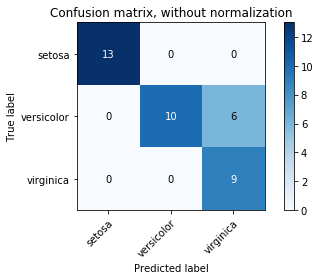

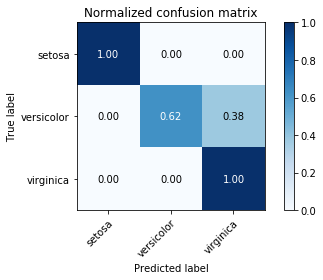

In [12]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
class_names = iris.target_names

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01)
y_pred = classifier.fit(X_train, y_train).predict(X_test)


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [22]:
y_pred_0 = np.zeros(10000).astype(int)
y_pred_0[:615] = 1
y_pred_1 = np.ones(10000).astype(int)
y_pred_1[:59] = 0
y_pred = np.append(y_pred_0, y_pred_1)

y_true_0 = np.zeros(10000).astype(int)
y_true_1 = np.ones(10000).astype(int)
y_true = np.append(y_true_0, y_true_1)

In [14]:
y_pred[:610] = 1
y_true[-59:] = 1

Normalized confusion matrix
[[0.94 0.06]
 [0.01 0.99]]


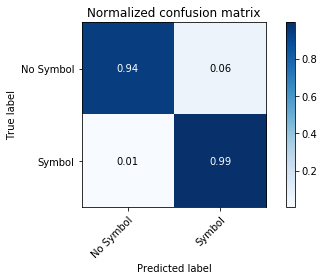

In [23]:
plot_confusion_matrix(y_true, y_pred, np.asarray(['No Symbol', 'Symbol']), normalize=True)

Normalized confusion matrix
[[0.99 0.01]
 [0.06 0.94]]


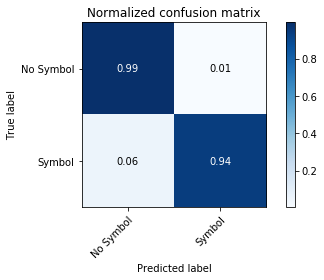

In [24]:
plot_confusion_matrix(y_pred, y_true, np.asarray(['No Symbol', 'Symbol']), normalize=True)